<a href="https://colab.research.google.com/github/ErickMartinezz/AprendizajeAutomatico/blob/main/TP4_Regresion_%2B_MLP_Automobiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP4 - REGRESIÓN + MLP

# Erick Martinez

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

# **Eleccion del dataset : Automobile https://archive.ics.uci.edu/dataset/10/automobile**



# Descargo el archivo

In [44]:
url: "https://archive.ics.uci.edu/static/public/10/automobile.zip"


In [45]:
!wget $url https://archive.ics.uci.edu/static/public/10/automobile.zip

--2025-06-03 14:54:49--  https://archive.ics.uci.edu/static/public/10/automobile.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘automobile.zip.1’

automobile.zip.1        [ <=>                ]   8.33K  --.-KB/s    in 0s      

2025-06-03 14:54:50 (106 MB/s) - ‘automobile.zip.1’ saved [8531]



# Al extraer el archivo, me genera un problema (no contiene archivo csv). Importo directamente a python desde la web. 👇

In [46]:
pip install ucimlrepo

In [47]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)


{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [48]:
print(X.head(5))


     price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  length wheel-base  \
0    2.68  3.47        mpfi          130  ...   168.8       88.6   
1    2.68  3.47        mpfi          130  ...   168.8       88.6   
2    3.47  2.68        mpfi          152  ...   171.2       94.5   
3    3.40  3.19        mpfi          109  ...   176.6       99.8   
4    3.40  3.19        mpfi          136  ...   176.6       99.4   

   engine-location  drive-wheels   body-style  num-of-doors  aspiration  \
0            front           rwd  convertible  

In [49]:
print (y.head(5))

   symboling
0          3
1          3
2          1
3          2
4          2


In [50]:
# prompt: combinar las variables en un dataframe

import pandas as pd

# Assuming X and y are already defined from the previous code (ucimlrepo)
# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Now you can work with the combined DataFrame 'df'
print(df.head())

     price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  wheel-base engine-location  \
0    2.68  3.47        mpfi          130  ...        88.6           front   
1    2.68  3.47        mpfi          130  ...        88.6           front   
2    3.47  2.68        mpfi          152  ...        94.5           front   
3    3.40  3.19        mpfi          109  ...        99.8           front   
4    3.40  3.19        mpfi          136  ...        99.4           front   

   drive-wheels   body-style  num-of-doors  aspiration  fuel-type  \

In [51]:
column_mapping = {
    'symboling': 'Simbolización',
    'normalized-losses': 'Pérdidas_normalizadas',
    'make': 'Marca',
    'fuel-type': 'Tipo_combustible',
    'aspiration': 'Aspiración',
    'num-of-doors': 'Número_puertas',
    'body-style': 'Tipo_carrocería',
    'drive-wheels': 'Tracción',
    'engine-location': 'Ubicación_motor',
    'wheel-base': 'Distancia_ejes',
    'length': 'Longitud',
    'width': 'Ancho',
    'height': 'Altura',
    'curb-weight': 'Peso_vacío',
    'engine-type': 'Tipo_motor',
    'num-of-cylinders': 'Número_cilindros',
    'engine-size': 'Tamaño_motor',
    'fuel-system': 'Sistema_combustible',
    'bore': 'Diámetro',
    'stroke': 'Carrera',
    'compression-ratio': 'Relación_compresión',
    'horsepower': 'Caballos_fuerza',
    'peak-rpm': 'RPM_máxima',
    'city-mpg': 'Consumo_ciudad',
    'highway-mpg': 'Consumo_carretera',
    'price': 'Precio'
}

df = df.rename(columns=column_mapping)


print(df.head())


    Precio  Consumo_carretera  Consumo_ciudad  RPM_máxima  Caballos_fuerza  \
0  13495.0                 27              21      5000.0            111.0   
1  16500.0                 27              21      5000.0            111.0   
2  16500.0                 26              19      5000.0            154.0   
3  13950.0                 30              24      5500.0            102.0   
4  17450.0                 22              18      5500.0            115.0   

   Relación_compresión  Carrera  Diámetro Sistema_combustible  Tamaño_motor  \
0                  9.0     2.68      3.47                mpfi           130   
1                  9.0     2.68      3.47                mpfi           130   
2                  9.0     3.47      2.68                mpfi           152   
3                 10.0     3.40      3.19                mpfi           109   
4                  8.0     3.40      3.19                mpfi           136   

   ...  Distancia_ejes Ubicación_motor  Tracción  Tipo_c

# 2. **Análisis exploratorio (previo al modelado)**  


   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

In [52]:
df.describe()

,Precio,Consumo_carretera,Consumo_ciudad,RPM_máxima,Caballos_fuerza,Relación_compresión,Carrera,Diámetro,Tamaño_motor,Número_cilindros,Peso_vacío,Altura,Ancho,Longitud,Distancia_ejes,Número_puertas,Pérdidas_normalizadas,Simbolización
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000,205.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000,2.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000,3.000000


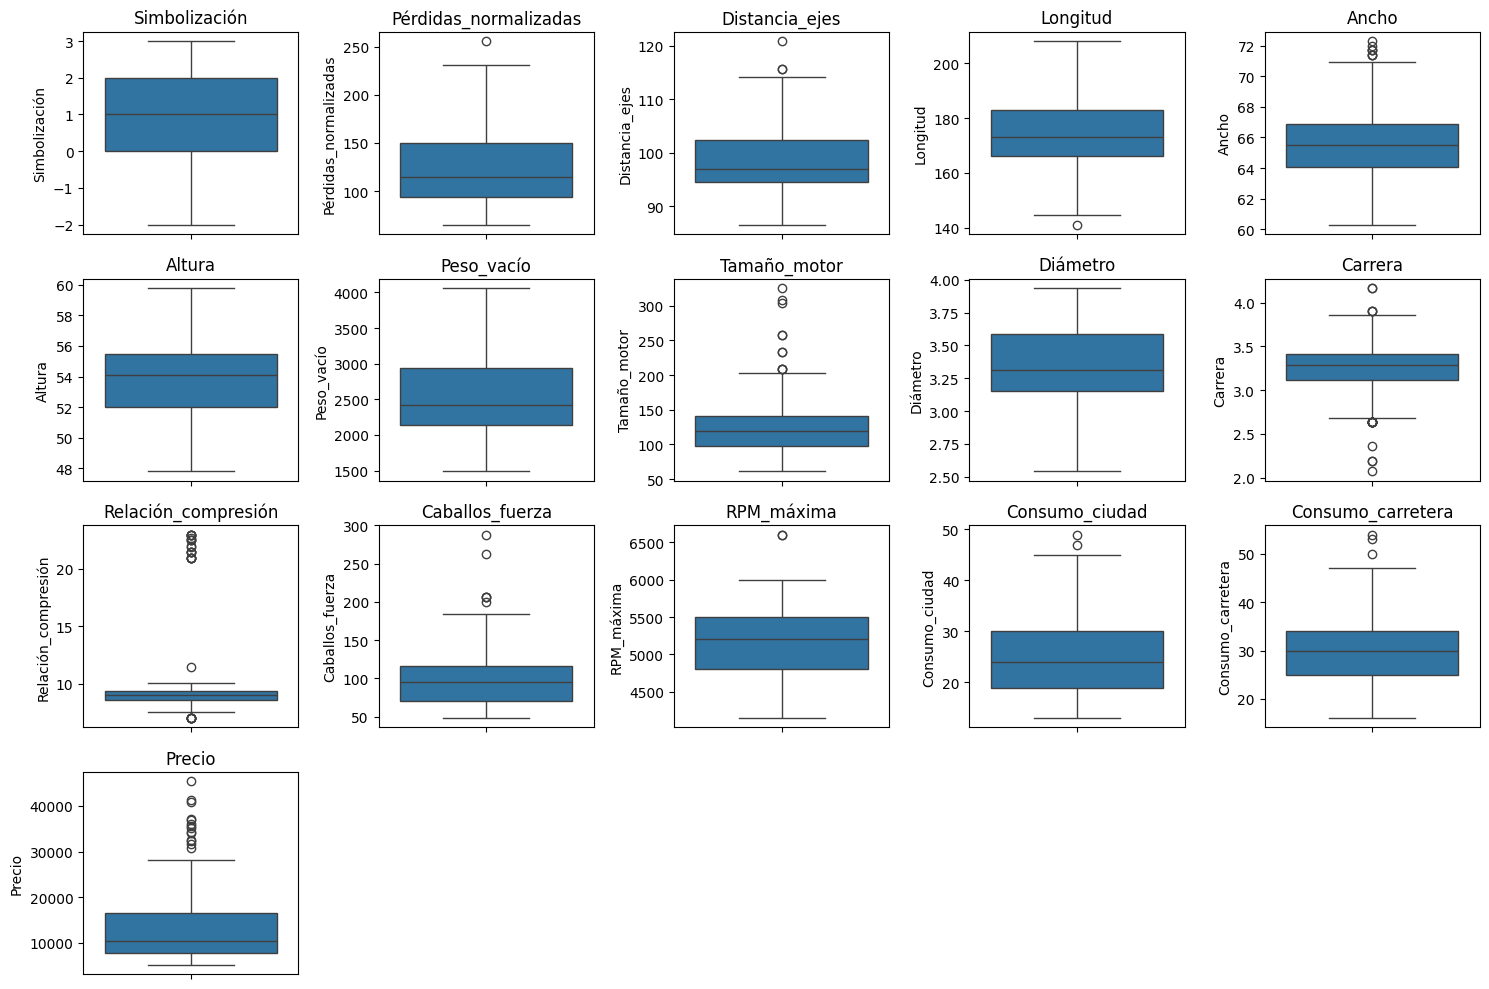

In [53]:
# prompt: crear boxplots para ver distribuciones

import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for numerical features
numerical_cols = ['Simbolización', 'Pérdidas_normalizadas', 'Distancia_ejes', 'Longitud', 'Ancho', 'Altura',
                  'Peso_vacío', 'Tamaño_motor', 'Diámetro', 'Carrera', 'Relación_compresión',
                  'Caballos_fuerza', 'RPM_máxima', 'Consumo_ciudad', 'Consumo_carretera', 'Precio']

plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i + 1)  # Create subplots for each feature
    sns.boxplot(y=df[col])  # Create boxplot
    plt.title(col)
    plt.tight_layout() #avoid overlapping


plt.show()

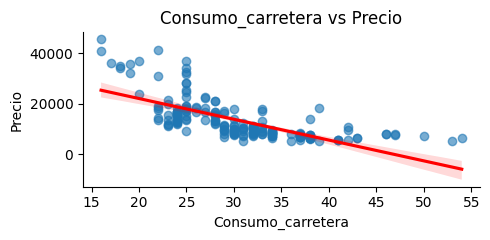

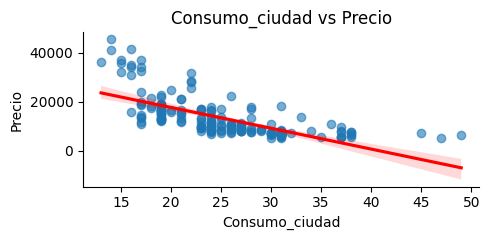

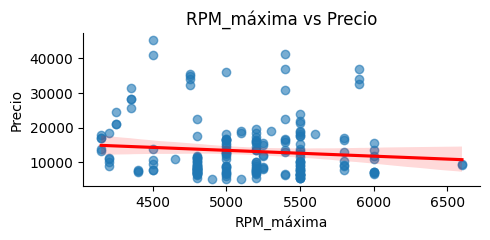

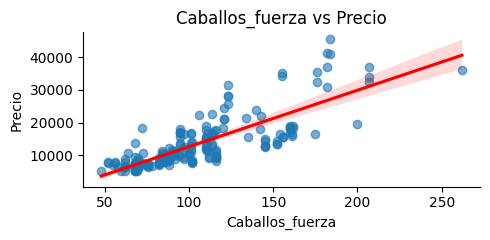

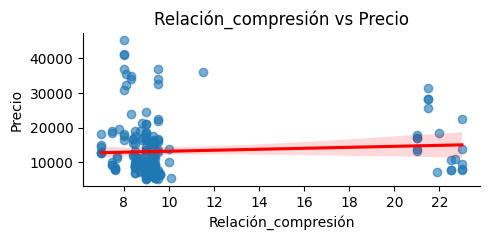

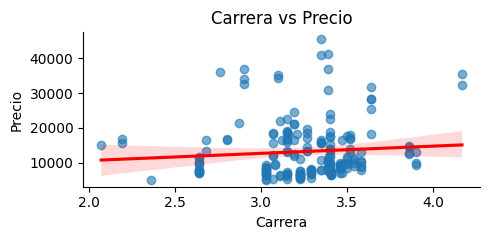

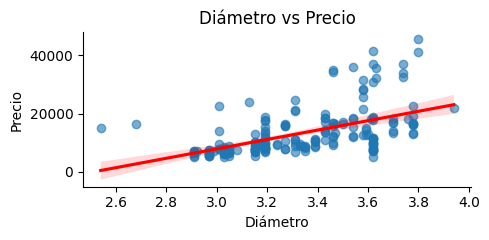

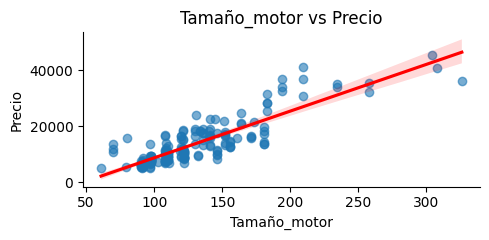

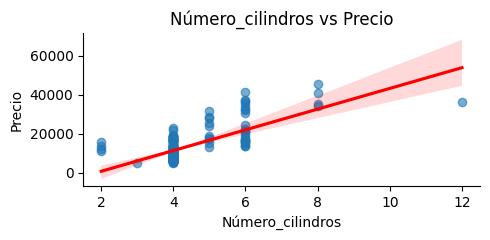

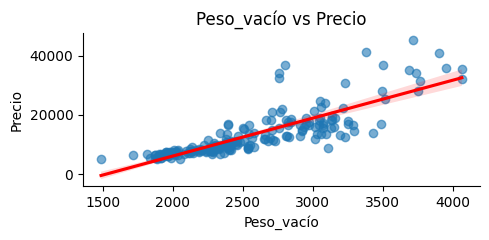

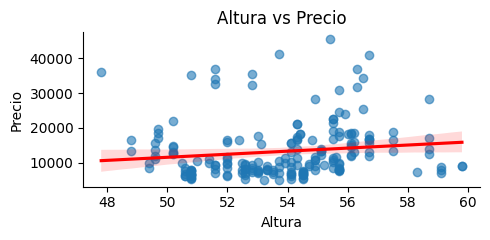

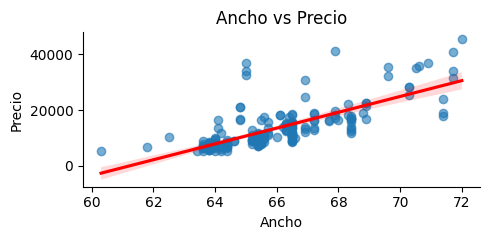

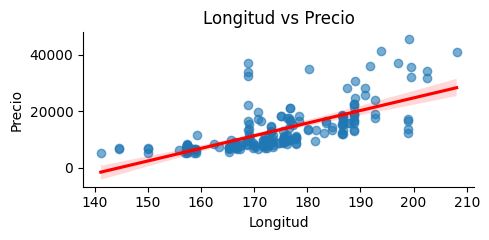

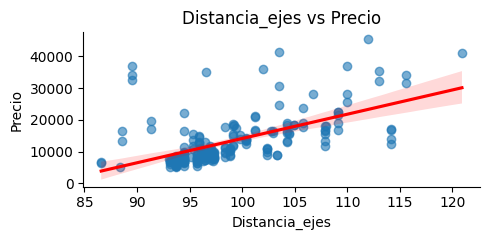

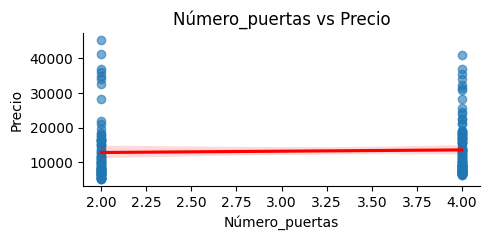

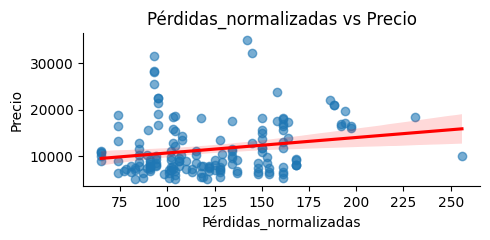

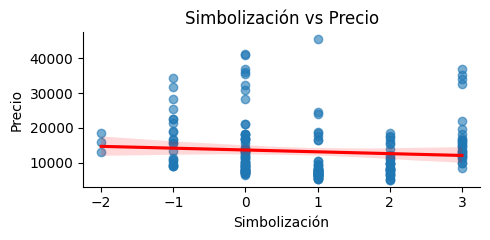

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

features = df.select_dtypes(include=['number']).columns.drop('Precio')  #Selecciono todas las columnas menos el precio

for feature in features:
    sns.lmplot(x=feature, y='Precio', data=df,  height=2.5, aspect=2, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'{feature} vs Precio')
    plt.tight_layout()
    plt.show()

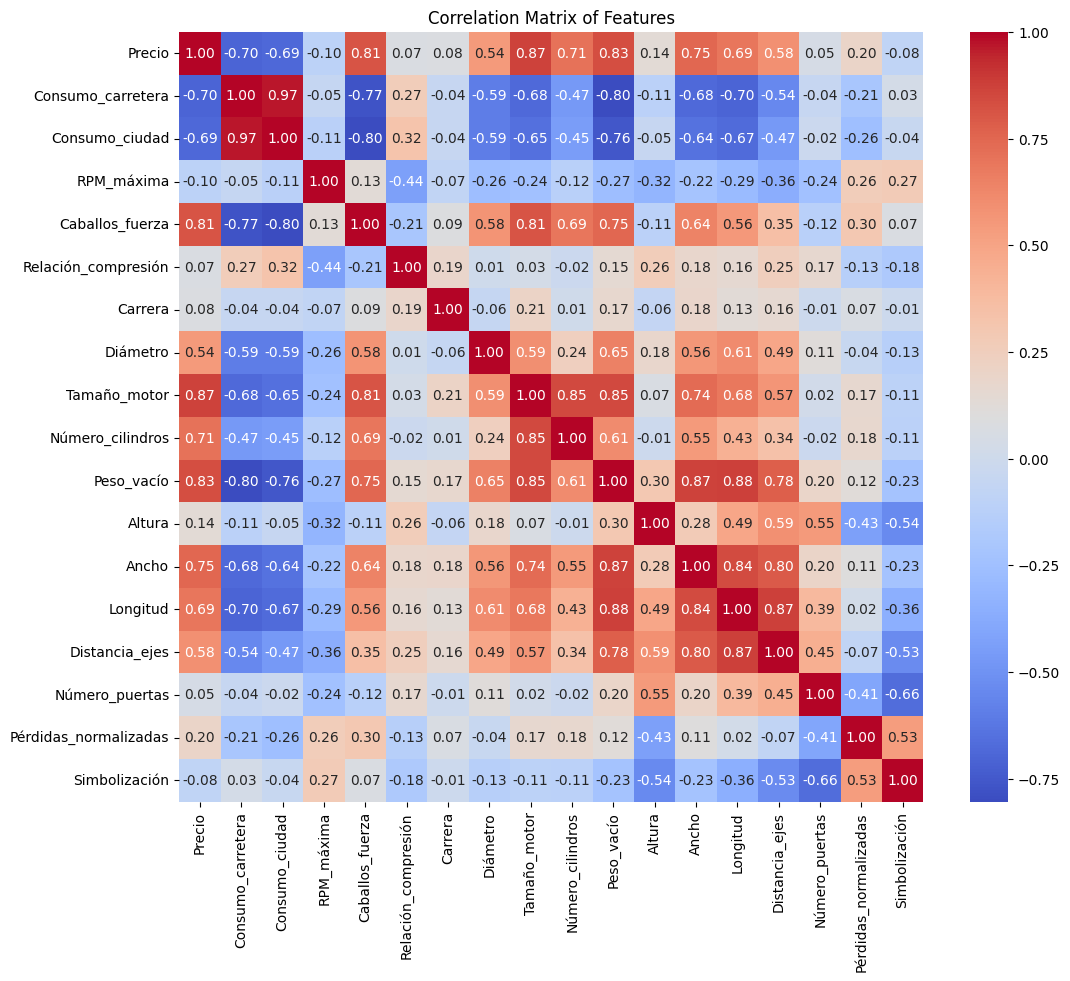

In [55]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

In [56]:

print(df.isnull().sum())


Precio                    4
Consumo_carretera         0
Consumo_ciudad            0
RPM_máxima                2
Caballos_fuerza           2
Relación_compresión       0
Carrera                   4
Diámetro                  4
Sistema_combustible       0
Tamaño_motor              0
Número_cilindros          0
Tipo_motor                0
Peso_vacío                0
Altura                    0
Ancho                     0
Longitud                  0
Distancia_ejes            0
Ubicación_motor           0
Tracción                  0
Tipo_carrocería           0
Número_puertas            2
Aspiración                0
Tipo_combustible          0
Marca                     0
Pérdidas_normalizadas    41
Simbolización             0
dtype: int64


In [57]:
df = df.drop(columns=['Pérdidas_normalizadas', 'Consumo_carretera' , 'Caballos_fuerza' ,'Número_cilindros' ,'Distancia_ejes' ,'Altura'])

In [58]:
for col in ['Precio','RPM_máxima','Diámetro','Carrera']:
    df[col] = df[col].fillna(df[col].median())

In [59]:
df['Número_puertas'] = df['Número_puertas'].fillna(df['Número_puertas'].mode()[0])


In [60]:
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [61]:
#ONE-HOT ENCODING (para variables categóricas)
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# DIVISIÓN ENTRE FEATURES Y TARGET
X = df.drop(columns='Precio')
y = df['Precio']

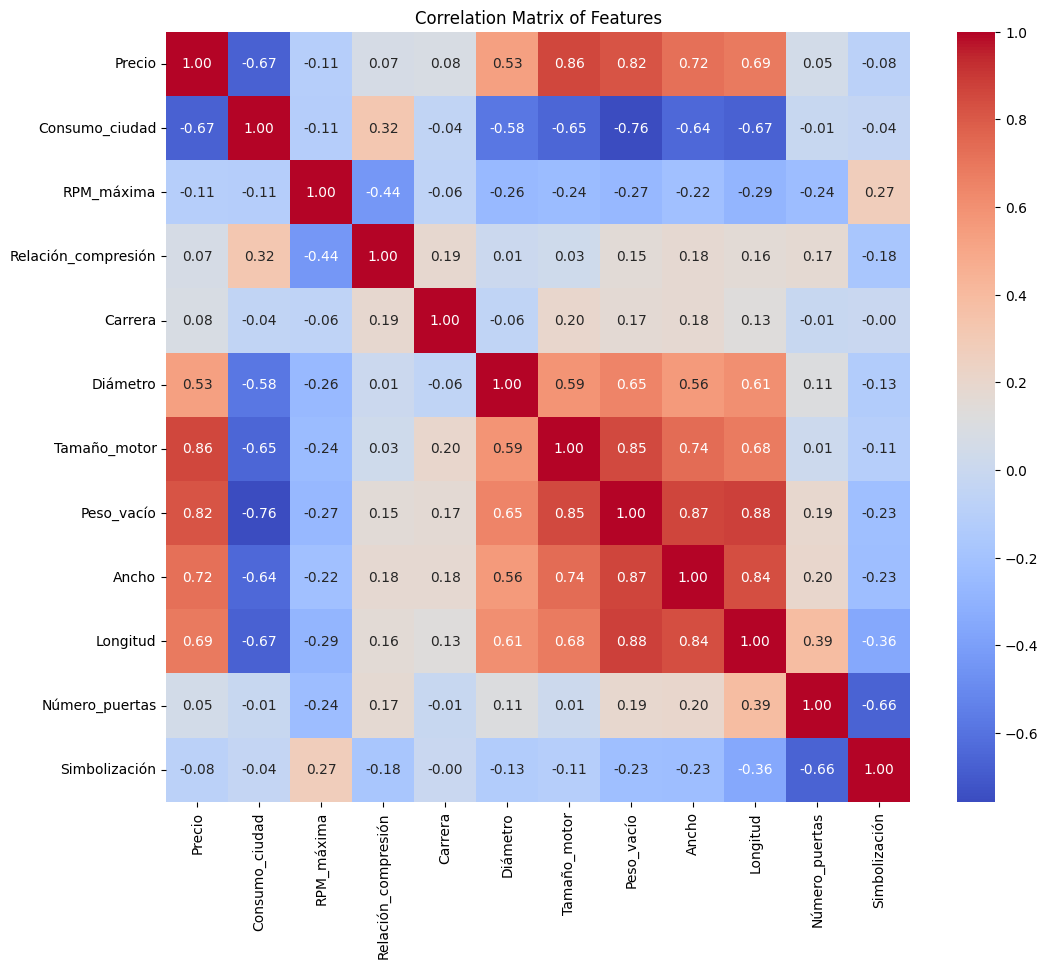

In [62]:
# prompt: crear grafico de correlacion

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_df' is your DataFrame with numerical features
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()





## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


In [63]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

In [64]:
# prompt: mostrar head de x, y escalado

import pandas as pd
print("X head after scaling:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())
print("\n")

print("y head:")
print(y.head())

X head after scaling:
   Consumo_ciudad  RPM_máxima  Relación_compresión   Carrera  Diámetro  \
0       -0.646553   -0.264983            -0.288349 -1.841345  0.520489   
1       -0.646553   -0.264983            -0.288349 -1.841345  0.520489   
2       -0.953012   -0.264983            -0.288349  0.683683 -2.403313   
3       -0.186865    0.785723            -0.035973  0.459947 -0.515795   
4       -1.106241    0.785723            -0.540725  0.459947 -0.515795   

   Tamaño_motor  Peso_vacío     Ancho  Longitud  Número_puertas  ...  \
0      0.074449   -0.014566 -0.844782 -0.426521       -1.141653  ...   
1      0.074449   -0.014566 -0.844782 -0.426521       -1.141653  ...   
2      0.604046    0.514882 -0.190566 -0.231513       -1.141653  ...   
3     -0.431076   -0.420797  0.136542  0.207256        0.875923  ...   
4      0.218885    0.516807  0.230001  0.207256        0.875923  ...   

   Marca_nissan  Marca_peugot  Marca_plymouth  Marca_porsche  Marca_renault  \
0     -0.310253      

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Métricas de evaluación
def evaluar(y_true, y_pred, nombre=""):
    print(f"\n⚙️  Evaluación en {nombre}:")
    print("R²:", r2_score(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))

evaluar(y_train, y_train_pred, "entrenamiento")
evaluar(y_test, y_test_pred, "test")



⚙️  Evaluación en entrenamiento:
R²: 0.9752075309486052
MSE: 1454359.4650205001
MAE: 932.6918827016818

⚙️  Evaluación en test:
R²: 0.8505687094197839
MSE: 10289126.764068766
MAE: 2061.0372794063765


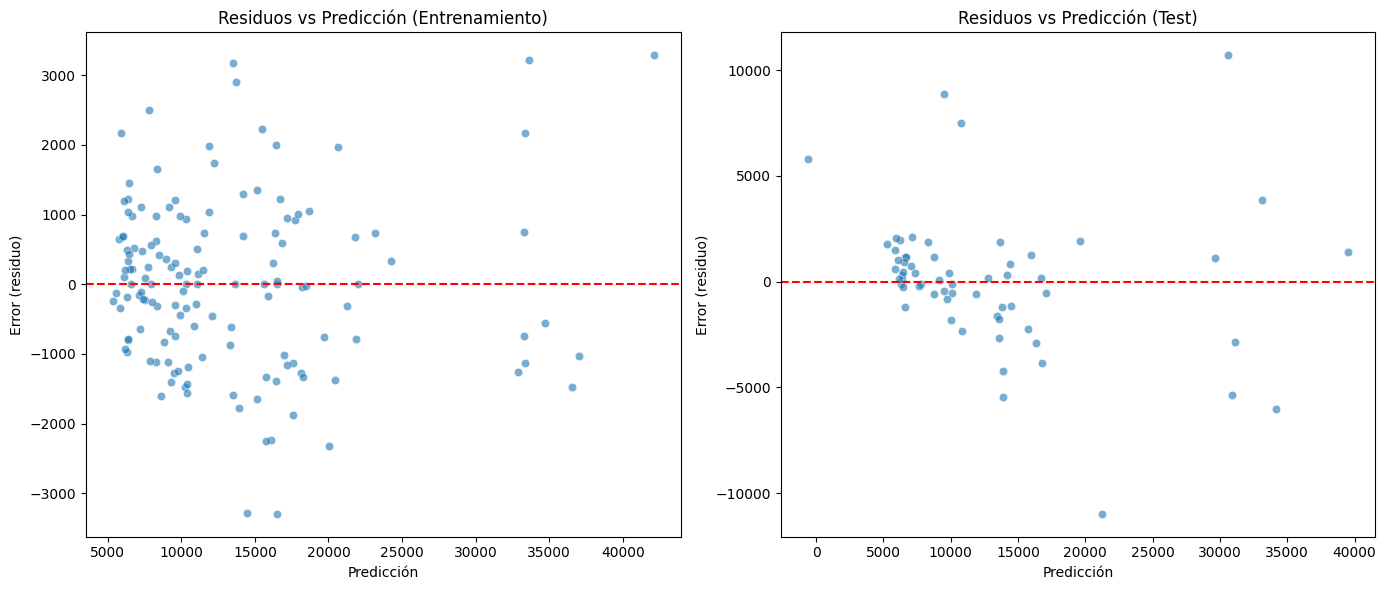

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular residuos
residuos_train = y_train - y_train_pred
residuos_test = y_test - y_test_pred

# Crear figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para entrenamiento
sns.scatterplot(x=y_train_pred, y=residuos_train, ax=axes[0], alpha=0.6)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Residuos vs Predicción (Entrenamiento)')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Error (residuo)')

# Gráfico para test
sns.scatterplot(x=y_test_pred, y=residuos_test, ax=axes[1], alpha=0.6)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Residuos vs Predicción (Test)')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Error (residuo)')

plt.tight_layout()
plt.show()



## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



## Resolución:

In [67]:
coeficientes = pd.Series(model.coef_, index=df.drop(columns='Precio').columns)
intercepto = model.intercept_

print("Intercepto:", intercepto)
print("\nCoeficientes:\n", coeficientes.sort_values(key=abs, ascending=False))

Intercepto: 13131.296070242286

Coeficientes:
 Tamaño_motor                 3.343641e+03
Peso_vacío                   2.242497e+03
Tipo_carrocería_sedan       -1.737340e+03
Ancho                        1.654143e+03
Tipo_carrocería_hatchback   -1.556135e+03
Tipo_motor_dohcv            -1.549524e+03
Tipo_carrocería_wagon       -1.408690e+03
Marca_bmw                    1.268518e+03
Marca_mercedes-benz          1.211326e+03
Marca_mitsubishi            -1.161316e+03
Marca_toyota                -1.157037e+03
Tipo_motor_rotor             1.151331e+03
Sistema_combustible_2bbl     1.113476e+03
Marca_nissan                -9.785639e+02
Sistema_combustible_mpfi     9.671966e+02
Aspiración_turbo             9.562469e+02
Marca_dodge                 -8.929484e+02
Marca_mazda                 -8.925068e+02
RPM_máxima                   8.540042e+02
Marca_plymouth              -8.227743e+02
Marca_porsche                8.065861e+02
Diámetro                    -7.542938e+02
Ubicación_motor_rear         


🎯 Variables más influyentes (por magnitud del coeficiente):

Tamaño_motor                 3343.640725
Peso_vacío                   2242.497075
Tipo_carrocería_sedan        1737.340337
Ancho                        1654.142798
Tipo_carrocería_hatchback    1556.135196
Tipo_motor_dohcv             1549.524455
Tipo_carrocería_wagon        1408.690358
Marca_bmw                    1268.517514
Marca_mercedes-benz          1211.325550
Marca_mitsubishi             1161.315828
dtype: float64


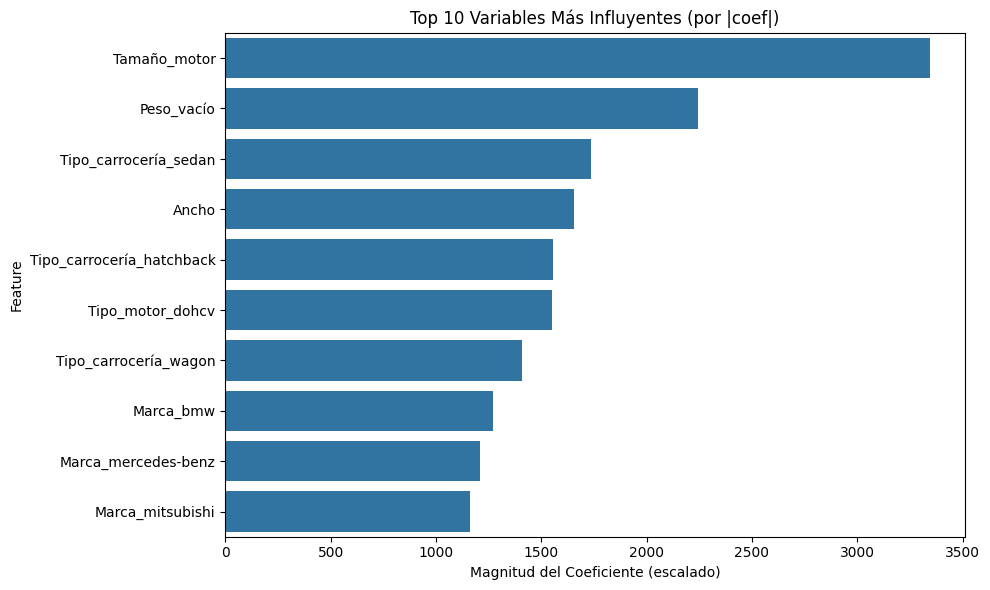

In [68]:
# Coeficientes ordenados por magnitud
coef_importancia = coeficientes.abs().sort_values(ascending=False)

print("\n🎯 Variables más influyentes (por magnitud del coeficiente):\n")
print(coef_importancia.head(10))

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_importancia.head(10), y=coef_importancia.head(10).index)
plt.title("Top 10 Variables Más Influyentes (por |coef|)")
plt.xlabel("Magnitud del Coeficiente (escalado)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



## Resolución:

Las variables mas importantes para el modelo son: Tamaño del motor, Peso vacio, Tipo de carroceria y Tipo de motor. Estas variables coinciden con el analisis exploratorio realizado al principio del trabajo.
Una vez normalizado los datos y realizando el analisis tambien se suma una variable importante que es la Marcar, siendo las de mayor relevancia BMW, Mercedes benz y Mitsubishi.

Se puede decir que los autos más grandes, potentes y de marcas premium tienen precios más altos, mientras que los modelos compactos, con carroceria economica o marcas de bajo costo tienden a ser más baratos.


---


El modelo tiene un buen rendimiento, en la parte del entrenamiento tiene un R² 0.97 mientras que en el test un R² 0.85 lo cual podria predecir bastante bien.

El MSE es un poco elevado, pero tambien hay que tener en cuenta la diferencia de los precios es bastante grande.


# **TP4 - REGRESIÓN + MLP**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [100]:
# FUNCIONES AUXILIARES PARA EVALUACIÓN
def evaluar_modelo(modelo, nombre):
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)

    print(f"\n🔎 Modelo: {nombre}")
    print("Train R²:", r2_score(y_train, y_train_pred))
    print("Test  R²:", r2_score(y_test, y_test_pred))
    print("Train MSE:", mean_squared_error(y_train, y_train_pred))
    print("Test  MSE:", mean_squared_error(y_test, y_test_pred))

    # Gráfico de valores reales vs predichos
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Valor real")
    plt.ylabel("Predicción")
    plt.title(f"Predicción vs Real ({nombre})")
    plt.grid()
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.




🔎 Modelo: Sobreajuste
Train R²: 0.993832632808292
Test  R²: 0.9002417337426016
Train MSE: 361786.0258663032
Test  MSE: 6868878.956346173


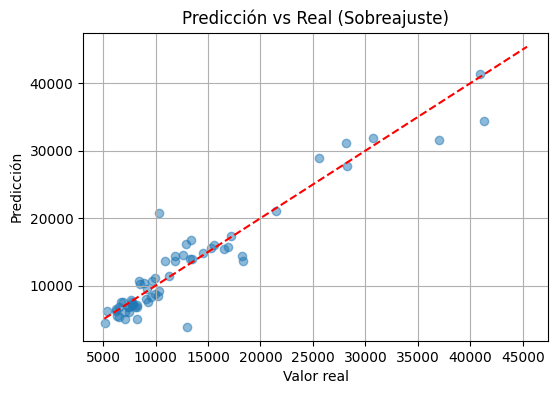

In [101]:
# --- 2.2 MODELO CON SOBREAJUSTE ---
mlp_overfit = MLPRegressor(hidden_layer_sizes=(200,150,100),
                           max_iter=2000,
                           alpha=0.00001,
                           random_state=42)
mlp_overfit.fit(X_train, y_train)
evaluar_modelo(mlp_overfit, "Sobreajuste")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.




🔎 Modelo: Subajuste
Train R²: -3.000134904998049
Test  R²: -2.405320886969517
Train MSE: 234653275.0886102
Test  MSE: 234474172.99492472


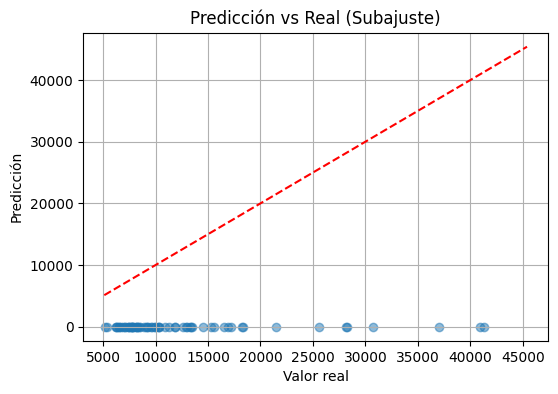

In [102]:
# --- 2.3 MODELO CON SUBAJUSTE ---
mlp_underfit = MLPRegressor(hidden_layer_sizes=(5,),
                            max_iter=100,
                            alpha=10,
                            random_state=42)
mlp_underfit.fit(X_train, y_train)
evaluar_modelo(mlp_underfit, "Subajuste")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.




🔎 Modelo: Ajuste Adecuado
Train R²: 0.8312573355893663
Test  R²: 0.6629697562474262
Train MSE: 9898670.867739841
Test  MSE: 23206296.93975446


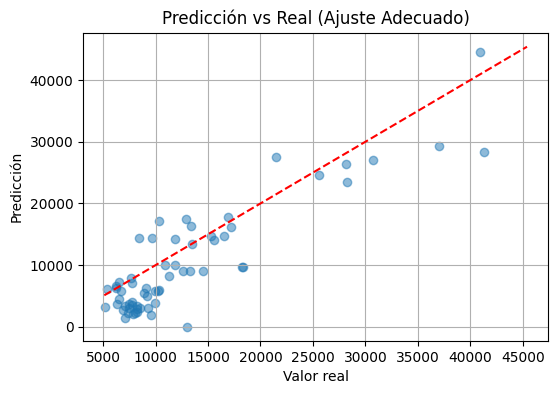

In [103]:
# --- 2.4 MODELO ADECUADO ---
mlp_good = MLPRegressor(hidden_layer_sizes=(50,30),
                        max_iter=1000,
                        alpha=0.001,
                        random_state=42)
mlp_good.fit(X_train, y_train)
evaluar_modelo(mlp_good, "Ajuste Adecuado")

Se entrenaron tres modelos de regresión utilizando redes neuronales multicapa (MLPRegressor):

Caso 1 (sobreajuste): Este modelo muestra un rendimiento casi perfecto en el conjunto de entrenamiento, lo que indica que ha aprendido muy bien los datos conocidos. Sin embargo, su rendimiento cae en el conjunto de testeo, lo que sugiere que el modelo ha sobreajustado. Es decir, ha memorizado el entrenamiento en lugar de generalizar correctamente.


Caso 2 (subajuste): En este caso, el modelo no logra aprender correctamente ni siquiera el conjunto de entrenamiento. El alto error cuadrático medio (MSE) lo confirma. Esto ocurre por una arquitectura demasiado simple y un regularizador muy fuerte.


Caso 3 (Ajuste adecuado): Este modelo presenta un equilibrio razonable entre el entrenamiento y el testeo. El R² en test sigue siendo alto y el error se mantiene en valores aceptables. Esto indica que el modelo está generalizando adecuadamente sin caer en sobreajuste ni subajuste.



In [107]:
import pandas as pd

# Crear DataFrame resumen
resultados = {
    "Modelo": ["Sobreajuste", "Subajuste", "Ajuste Adecuado"],
    "R² Train": [0.994, -3.000, 0.831],
    "R² Test": [0.900, -2.405, 0.663],
    "MSE Train": [361786, 234653275, 9898671],
    "MSE Test": [6868879, 234474173, 23206297],
}

df_resultados = pd.DataFrame(resultados)
df_resultados


,Modelo,R² Train,R² Test,MSE Train,MSE Test
0,Sobreajuste,0.994,0.900,361786,6868879
1,Subajuste,-3.000,-2.405,234653275,234474173
2,Ajuste Adecuado,0.831,0.663,9898671,23206297


In [108]:
# prompt: crear grafico interactivo comparando los modelos "modelo"

import plotly.graph_objects as go

# Crear figura interactiva
fig = go.Figure()

# Añadir barras para R²
fig.add_trace(go.Bar(
    x=df_resultados['Modelo'],
    y=df_resultados['R² Train'],
    name='R² Train',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=df_resultados['Modelo'],
    y=df_resultados['R² Test'],
    name='R² Test',
    marker_color='lightsalmon'
))

# Añadir líneas para MSE
fig.add_trace(go.Scatter(
    x=df_resultados['Modelo'],
    y=df_resultados['MSE Train'],
    mode='lines+markers',
    name='MSE Train',
    yaxis='y2',
    marker_color='darkblue'
))
fig.add_trace(go.Scatter(
    x=df_resultados['Modelo'],
    y=df_resultados['MSE Test'],
    mode='lines+markers',
    name='MSE Test',
    yaxis='y2',
    marker_color='lightblue'
))

# Layout con dos ejes Y
fig.update_layout(
    title='Comparación de Modelos: R² y MSE',
    xaxis=dict(title='Modelo'),
    yaxis=dict(title='R²', titlefont=dict(color='indianred'), tickfont=dict(color='indianred')),
    yaxis2=dict(title='MSE', titlefont=dict(color='darkblue'), tickfont=dict(color='darkblue'), overlaying='y', side='right'),
    barmode='group',
    hovermode='x unified'
)

fig.show()


## **Conclusión final, comparación de modelos:**


Comparando los modelos de MLP con el hecho anteriormente de Regresion Lineal,  se puede obsverbar que el unico modelo que logra superarlo es el de sobreajuste aunque corre el riesgo de no generalizar bien.


En el caso de los otros modelos ambos tienen un peor desempeñ, por lo que no seria recomendable utilizarlos.

En base a estos resultados, creo que es recomendable usar una regresion lineal ya que tiene buena capacidad de predecir sin sobreajuste.